# Лабораторная работа №7

In [1]:
import math
from itertools import islice
from typing import Tuple

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
from matplotlib.image import imread
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler

### Загрузка данных

X shape: (300, 2)


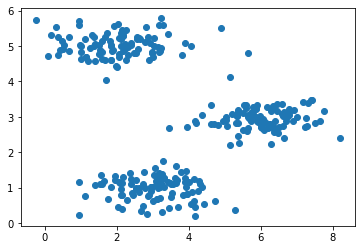

In [2]:
DATA = loadmat("ex7data1.mat")
X = DATA["X"]

print(f"X shape: {X.shape}")

plt.scatter(X[:, 0], X[:, 1])
plt.show()

#### Нормализация входных данных

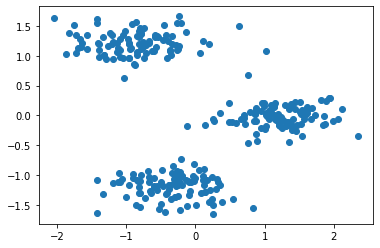

In [3]:
X_SCALED = StandardScaler().fit_transform(X)

data_fig, data_ax = plt.subplots()
plt.scatter(X_SCALED[:, 0], X_SCALED[:, 1])
plt.show()

### Функция вычисления ковариационной матрицы

In [4]:
def covariance_matrix(x: np.ndarray) -> np.ndarray:
    return (x.T @ x) / len(x)

#### Собственные вектора

Vector coordinates:
[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]


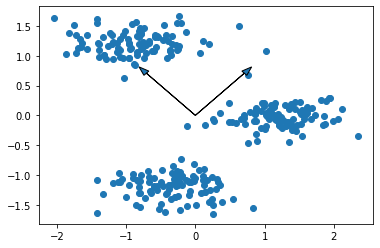

In [5]:
x_eigenvectors, *_ = np.linalg.svd(covariance_matrix(X_SCALED))
print(f"Vector coordinates:\n{x_eigenvectors}")

X_SCALED_MEAN = np.mean(X_SCALED, axis=0)

for eigenvec in x_eigenvectors:
    data_ax.arrow(
        X_SCALED_MEAN[0],
        X_SCALED_MEAN[1],
        eigenvec[0],
        eigenvec[1],
        head_width=0.1
    )

data_fig

### Метод главных компонент

In [6]:
def pca(x: np.ndarray, k: int) -> Tuple[np.ndarray, np.ndarray]:
    """Returns a tuple with reduced data array and U-reduce matrix"""
    u, s, v = np.linalg.svd(covariance_matrix(x))
    u_reduced = u[:, :k]
    return x @ u_reduced, u_reduced

### Восстановление сжатых данных

In [7]:
def reconstruct_from_pca(z: np.ndarray, u_reduced: np.ndarray) -> np.ndarray:
    return z @ u_reduced.T

### Отображение сжатых и востановленных данных

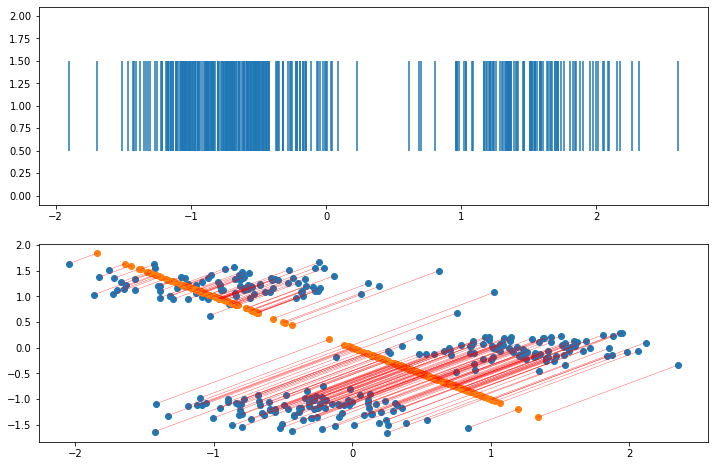

In [8]:
compressed_fig, (compressed_ax_1d, compressed_ax_2d) = plt.subplots(nrows=2, figsize=(12, 8))

x_scaled_1d, x_scaled_1d_u_reduced = pca(X_SCALED, 1)

compressed_ax_1d.eventplot(np.ravel(x_scaled_1d))

x_scaled_approx = reconstruct_from_pca(x_scaled_1d, x_scaled_1d_u_reduced)
compressed_ax_2d.scatter(X_SCALED[:, 0], X_SCALED[:, 1])
compressed_ax_2d.scatter(x_scaled_approx[:, 0], x_scaled_approx[:, 1])

for x, x_approx in zip(X_SCALED, x_scaled_approx):
    compressed_ax_2d.plot(
        [x[0], x_approx[0]],
        [x[1], x_approx[1]],
        color="red",
        linewidth=0.3
    )
plt.show()

### Загрузка изображений

In [9]:
FACES = loadmat("ex7faces.mat")

IMG_MATRIX = FACES["X"]
IMG_HEIGHT = IMG_WIDTH = 32
IMG_SHAPE = (IMG_HEIGHT, IMG_WIDTH)

print(f"Image vectors shape: {IMG_MATRIX.shape}")

Image vectors shape: (5000, 1024)


### Отображение изображений

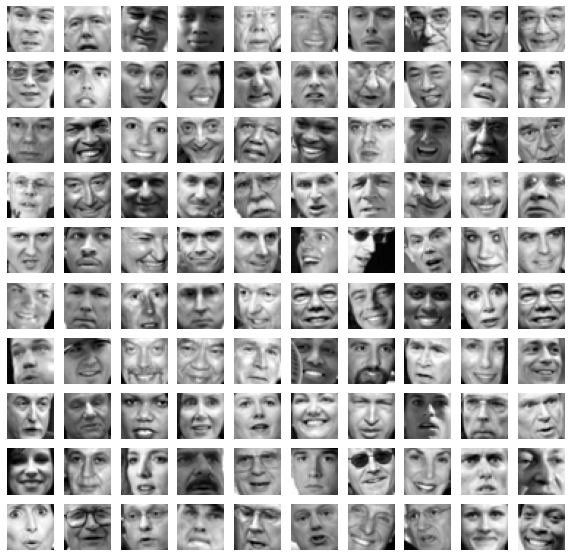

In [10]:
def display_img(img_vector: np.ndarray, ax: Axes = plt):
    ax.axis("off")
    ax.imshow(np.reshape(img_vector, IMG_SHAPE).T, cmap="gray")
    

def display_images(img_matrix: np.ndarray, img_per_row: int = 10):
    img_rows = int(math.ceil(img_matrix.shape[0] / img_per_row))
    
    img_fig, img_axes = plt.subplots(nrows=img_rows, ncols=img_per_row, figsize=(10, 10))
    for img_index, img_vector in enumerate(img_matrix):
        if img_rows > 1:
            row = img_index // img_per_row
            col = img_index % img_per_row
            ax = img_axes[row][col]
        else:
            ax = img_axes[img_index]
        display_img(img_vector, ax)


DISPLAY_IMG_COUNT = 100
DISPLAY_IMG = IMG_MATRIX[np.random.choice(IMG_MATRIX.shape[0], DISPLAY_IMG_COUNT)]
display_images(DISPLAY_IMG)

#### Собственные вектора

In [11]:
img_eigenvectors, *_ = np.linalg.svd(covariance_matrix(IMG_MATRIX))
print(f"Vector coordinates:\n{img_eigenvectors}")

Vector coordinates:
[[-0.01640988 -0.04222849 -0.0421747  ...  0.00078787  0.00059301
   0.00069988]
 [-0.01692408 -0.04109658 -0.04413594 ... -0.0014743  -0.00159743
  -0.00183183]
 [-0.01714767 -0.03963341 -0.04577663 ...  0.00796443  0.00053733
   0.00152458]
 ...
 [-0.0085838  -0.05826306  0.04851035 ... -0.00294466  0.00394326
   0.00497121]
 [-0.00680308 -0.06081527  0.04664601 ...  0.00038729 -0.00186067
  -0.00185365]
 [-0.005765   -0.06173977  0.04483153 ...  0.00228049  0.00058499
   0.00071138]]


### 36 главных компонент с наибольшей дисперсией

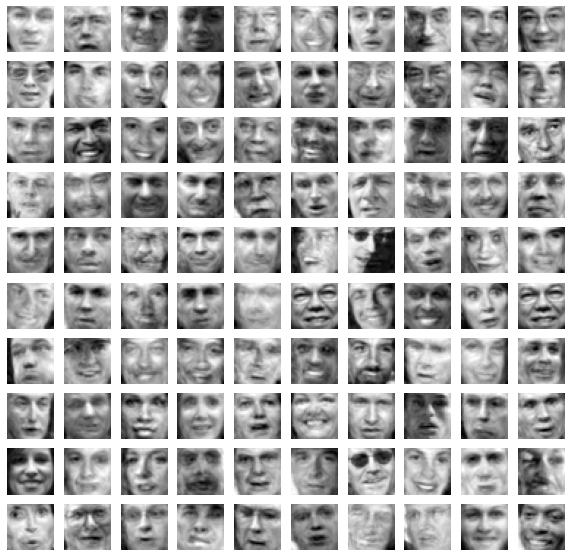

In [12]:
img_compressed_36, img_compressed_36_u_reduced = pca(DISPLAY_IMG, 36)
img_approx_36 = reconstruct_from_pca(img_compressed_36, img_compressed_36_u_reduced)

display_images(img_approx_36)

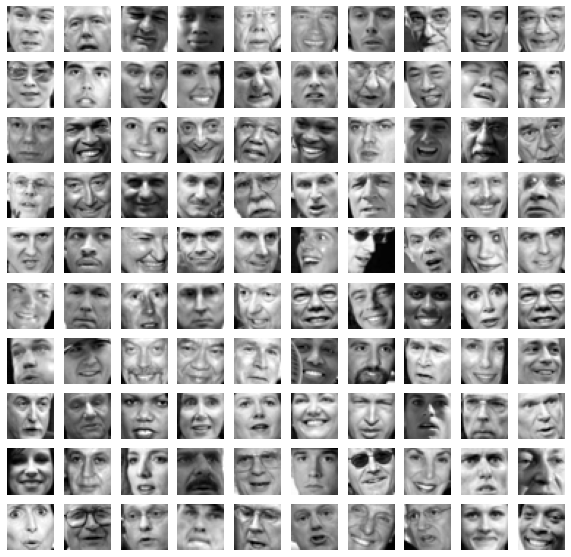

In [13]:
img_compressed_100, img_compressed_100_u_reduced = pca(DISPLAY_IMG, 100)
img_approx_100 = reconstruct_from_pca(img_compressed_100, img_compressed_100_u_reduced)

display_images(img_approx_100)

### Визуализация изображения в 2D и 3D

Image reshaped: (16384, 3)


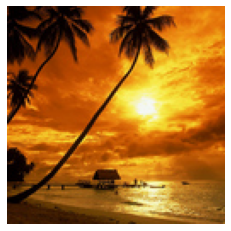

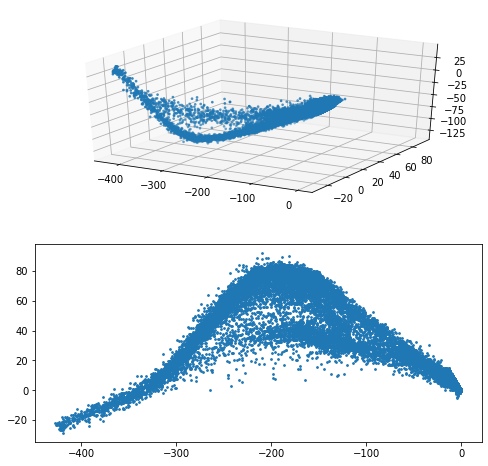

In [14]:
NICE_IMG = np.rint(imread("../lab6/nice.png") * 255).astype(np.uint8)
NICE_IMG_HEIGHT, NICE_IMG_WIDTH, NICE_IMG_COLOR = NICE_IMG.shape
NICE_IMG_RESHAPED = np.reshape(NICE_IMG, (NICE_IMG_HEIGHT * NICE_IMG_WIDTH, -1))
print(f"Image reshaped: {NICE_IMG_RESHAPED.shape}")

plt.imshow(NICE_IMG)
plt.axis("off")

nice_img_fig = plt.figure(figsize=(8, 8))

nice_img_3d, nice_img_3d_u_reduced = pca(NICE_IMG_RESHAPED, 3)
nice_img_ax_3d = nice_img_fig.add_subplot(2, 1, 1, projection="3d")
nice_img_ax_3d.scatter(
    nice_img_3d[:, 0],
    nice_img_3d[:, 1],
    nice_img_3d[:, 2],
    s=3
)

nice_img_2d, nice_img_2d_u_reduced = pca(NICE_IMG_RESHAPED, 2)
nice_img_ax_2d = nice_img_fig.add_subplot(2, 1, 2)
nice_img_ax_2d.scatter(nice_img_2d[:, 0], nice_img_2d[:, 1], s=3)

plt.show()